In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from itertools import product
from pathlib import Path

In [2]:
data_dir = Path('data')

X_train = np.load(data_dir / 'X_train.npz')['arr_0']
X_test = np.load(data_dir / 'X_test.npz')['arr_0']
Y_train = np.load(data_dir / 'Y_train.npz')['arr_0']

In [3]:
X_train.shape, X_test.shape, Y_train.shape

((47500, 10000), (2500, 10000), (47500, 3))

In [4]:
n_targets = Y_train.shape[1]

In [212]:
Path('./figs').mkdir(775, exist_ok=True)

In [179]:
half = 5000

# First half

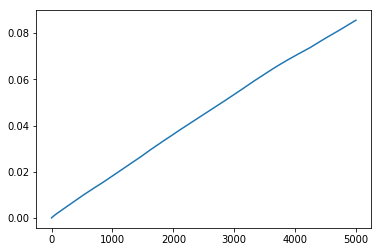

In [180]:
plt.plot(X_train[0, :half])
plt.show()

In [217]:
(X_train[:, :half].min(axis=1) == X_train[:, 0]).all()

True

In [218]:
(X_train[:, :half].max(axis=1) == X_train[:, -1]).all()

False

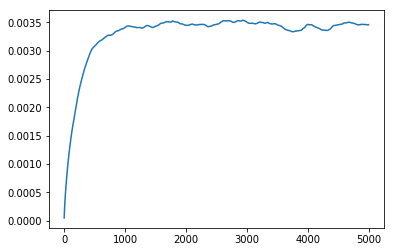

In [221]:
not_linear_idx = np.nonzero(X_train[:, :half].max(axis=1) != X_train[:, half-1])[0][-4]
plt.plot(X_train[not_linear_idx, :half])
plt.show()

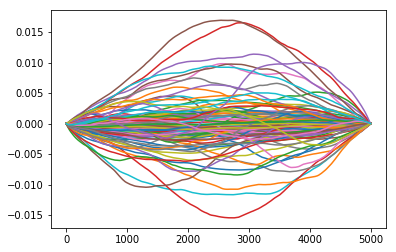

In [186]:
for n in range(100):
    x = X_train[n, :half]
    xm, xM = x[0], x[-1]
    plt.plot([xm + (xM - xm) / half * i - x[i] for i in range(half)])
plt.show()

# Second half

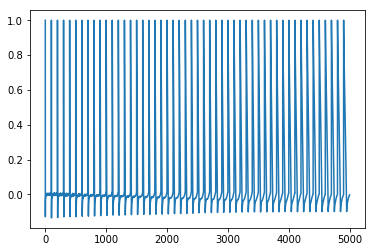

In [187]:
plt.plot(X_train[0, half:])
plt.show()

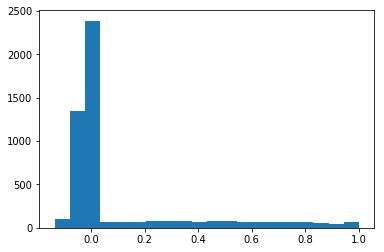

In [188]:
plt.hist(X_train[0, half:], bins=20)
plt.show()

In [189]:
n_groups = 50
group_size = half // n_groups

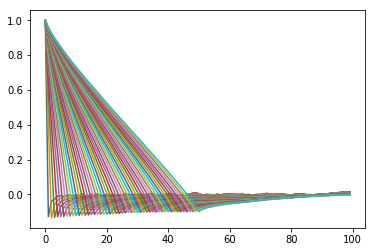

In [190]:
for i in range(n_groups):
    plt.plot(X_train[0, half + group_size*i : half + group_size*(i+1)])
    plt.savefig('figs/x0_last5000_group{}'.format(i))
plt.show()

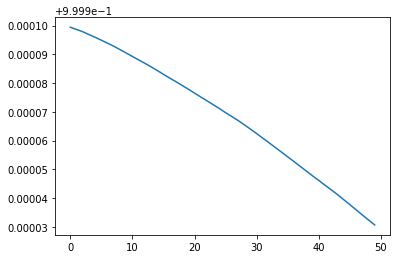

In [191]:
plt.plot(X_train[0, half::group_size])
plt.show()

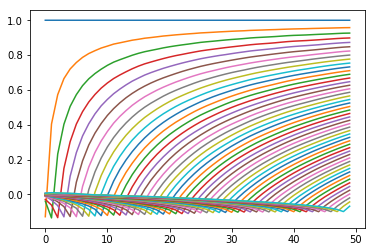

In [193]:
for i in range(group_size // 2):
    plt.plot(X_train[0, half+i::group_size])
    plt.savefig('figs/x0_last5000_dim{}'.format(i))
plt.show()

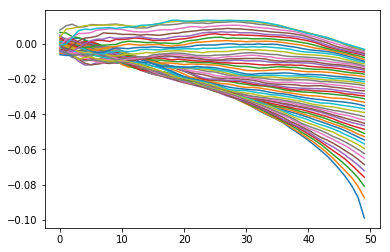

In [194]:
for i in range(group_size // 2, group_size):
    plt.plot(X_train[0, half+i::group_size])
    plt.savefig('figs/x0_last5000_dim{}'.format(i))
plt.show()

In [208]:
for i in range(100):
    rfft = np.fft.rfft(X_train[i, half:]).real
    plt.plot(rfft)
    plt.savefig('figs/last5000_rfft_x{}'.format(i))
    plt.clf()

<Figure size 432x288 with 0 Axes>

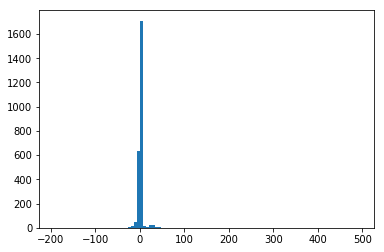

In [141]:
plt.hist(rfft, bins=100)
plt.show()

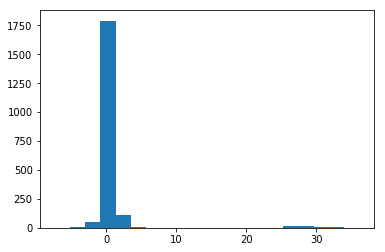

27.628097225670913
[0, 50, 51, 52, 53, 100, 101, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500]
[492.73973297 447.19126396 188.93699465 112.34183341  81.2807799
  64.35908082  54.33066879  47.99211655  44.20828339  39.2529214
  38.36537629  36.1629814   35.36324495  33.38540277  32.58859849
  31.84179188  30.78061538  31.18089499  30.51985471  29.93041374
  29.6225286   28.9139544   29.00609099  28.91768934  28.514898
  28.67057145  28.3323924   28.28690744  27.88394378  27.8802661
  27.68849253  27.55485687  27.62809723  27.39575561  27.32501308
  27.3567903   27.30197769  27.04532149  27.17391829  27.20940274
  27.09243993  27.26758459  27.13059104  27.11096569  27.00967306
  26.95063857  26.89008868  26.99297476  26.96281265  26.88586033
  27.07202935]


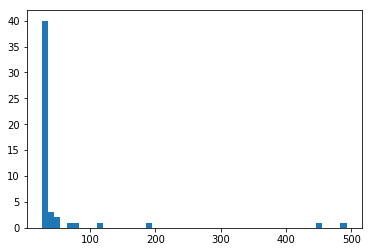

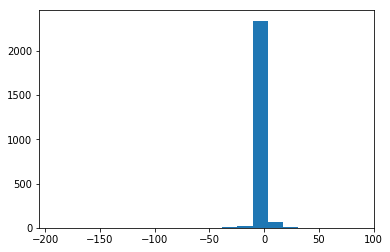

In [148]:
plt.hist(rfft[-2000:], bins=20)
plt.show()

print(max(rfft[-1000:]))
print([i for i in range(len(rfft)) if rfft[i] > 25])
print(rfft[::50])

plt.hist(rfft[::50], bins=50)
plt.show()
plt.hist([rfft[i] for i in range(len(rfft)) if i % 50 != 0], bins=20)
plt.show()

In [116]:
rfft.shape, rfft[np.abs(rfft) > 1].shape, rfft[np.abs(rfft) > 10].shape, rfft[np.abs(rfft) > 50].shape

((5001,), (1724,), (250,), (32,))

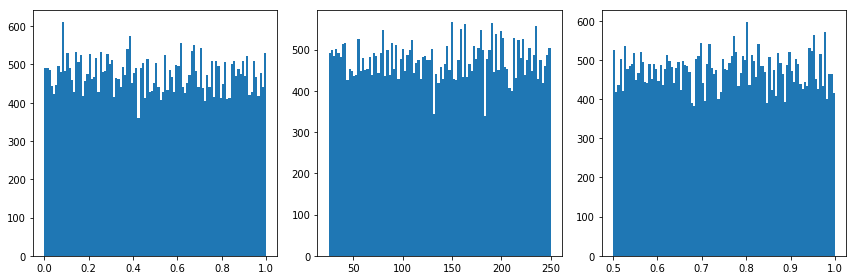

In [6]:
fig, axes = plt.subplots(1, n_targets)
fig.set_figwidth(12)
for i in range(n_targets):
    axes[i].hist(Y_train[:, i], bins=100)
plt.tight_layout()
plt.show()

[]

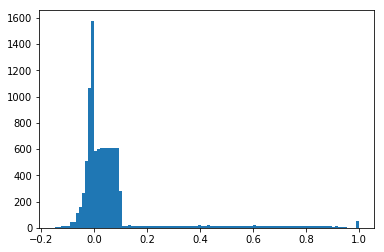

In [17]:
means = X_train.mean(axis=0)
plt.hist(means, bins=100)
plt.plot()

[]

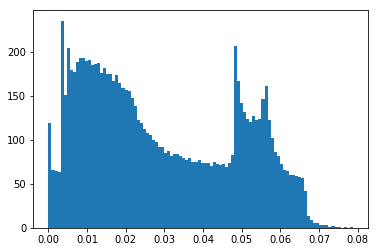

In [18]:
stds = X_train.std(axis=0)
plt.hist(stds, bins=100)
plt.plot()

In [128]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [121]:
cmap = plt.cm.get_cmap("jet", 10)

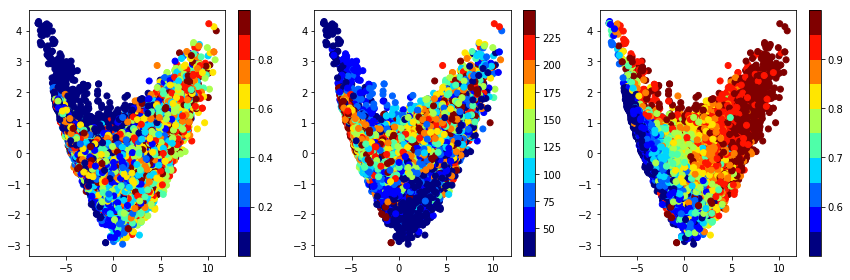

In [122]:
n = X_train.shape[0]
X_train_pca = PCA(n_components=2).fit_transform(X_train[:n])
fig, axes = plt.subplots(1, n_targets)
fig.set_figwidth(12)
for i in range(n_targets):
    im = axes[i].scatter(X_train_pca[:n, 0], X_train_pca[:n, 1], c=Y_train[:n, i], cmap=cmap)
    plt.colorbar(im, ax=axes[i])
plt.tight_layout()
plt.show()

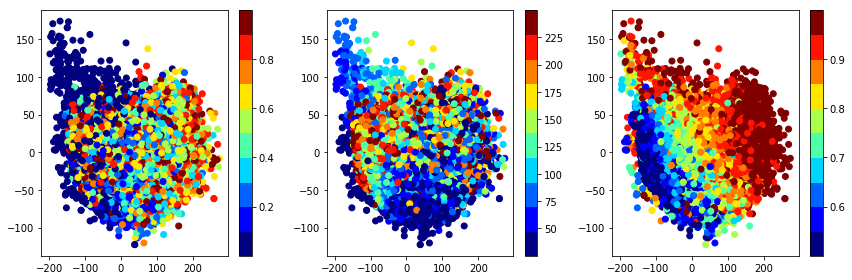

In [129]:
n = X_train.shape[0]
X_train_scaled_pca = PCA(n_components=2).fit_transform(X_train_scaled[:n])
fig, axes = plt.subplots(1, n_targets)
fig.set_figwidth(12)
for i in range(n_targets):
    im = axes[i].scatter(X_train_scaled_pca[:n, 0], X_train_scaled_pca[:n, 1], c=Y_train[:n, i], cmap=cmap)
    plt.colorbar(im, ax=axes[i])
plt.tight_layout()
plt.show()

In [74]:
%%time

X_train_pca_for_tsne = PCA(n_components=50).fit_transform(X_train)

CPU times: user 54.2 s, sys: 29.2 s, total: 1min 23s
Wall time: 49.6 s


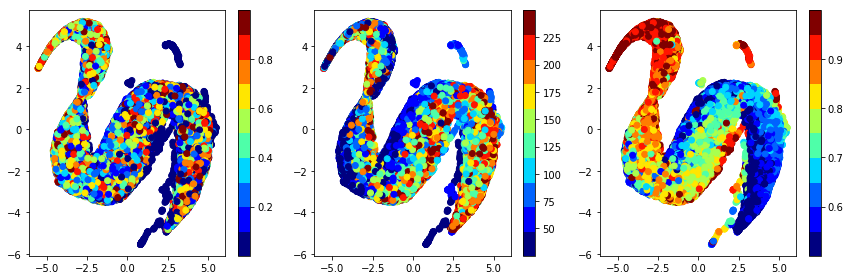

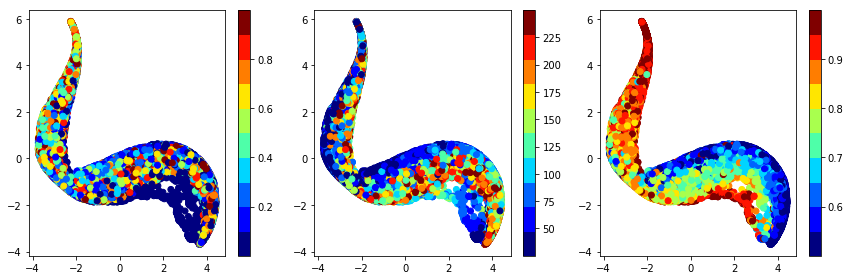

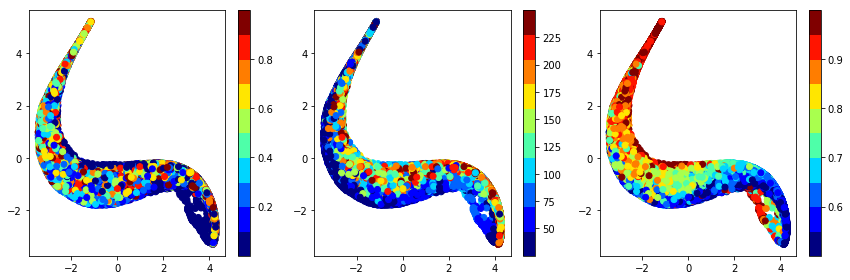

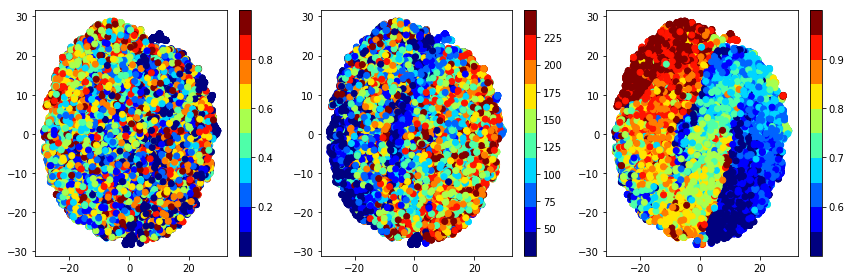

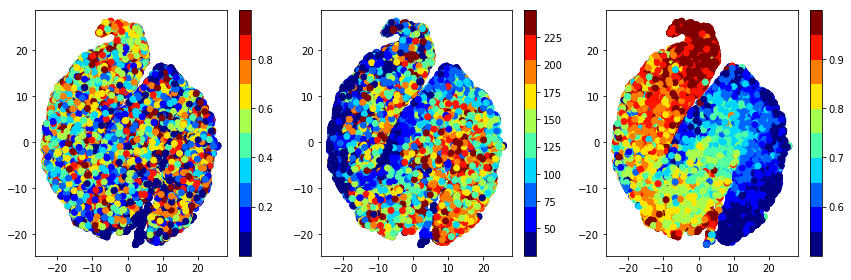

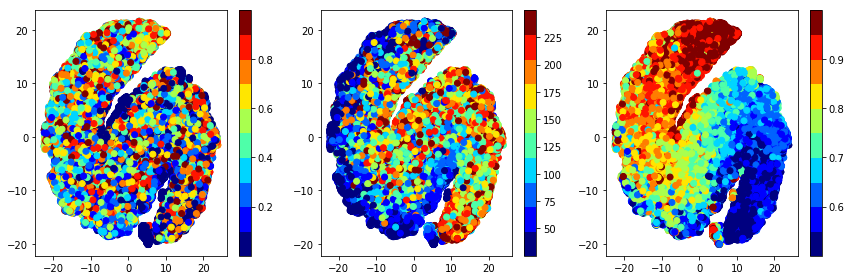

In [117]:
%%time

# n = 100
n = X_train.shape[0]
for n_iter, perplexity in product([250, 500], [5, 25, 50]):
    tsne = TSNE(n_components=2, n_iter=n_iter, perplexity=perplexity, random_state=1126)
    X_train_tsne = tsne.fit_transform(X_train_pca_for_tsne[:n])
    fig, axes = plt.subplots(1, n_targets)
    fig.set_figwidth(12)
    for i in range(n_targets):
        im = axes[i].scatter(X_train_tsne[:n, 0], X_train_tsne[:n, 1], c=Y_train[:n, i], cmap=cmap)
        plt.colorbar(im, ax=axes[i])
    plt.tight_layout()
    plt.show()

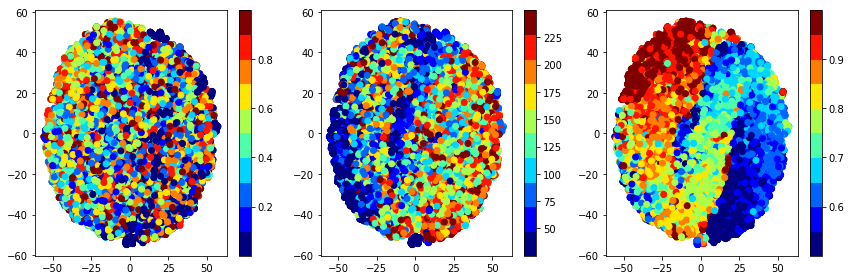

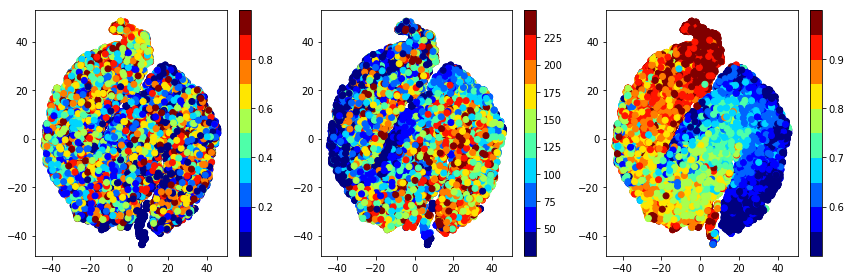

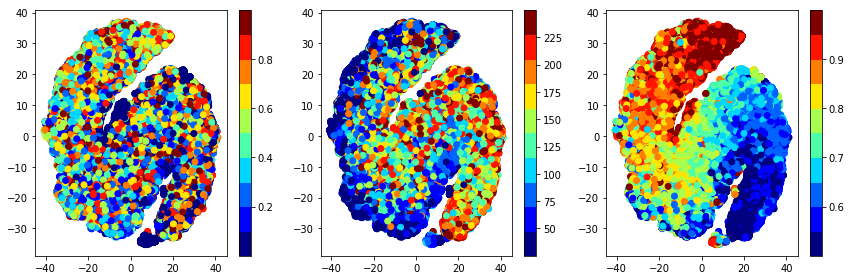

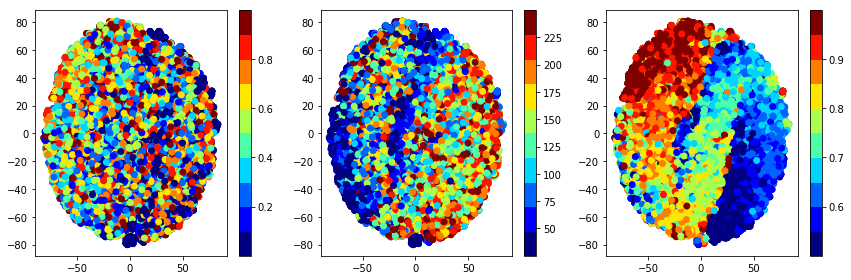

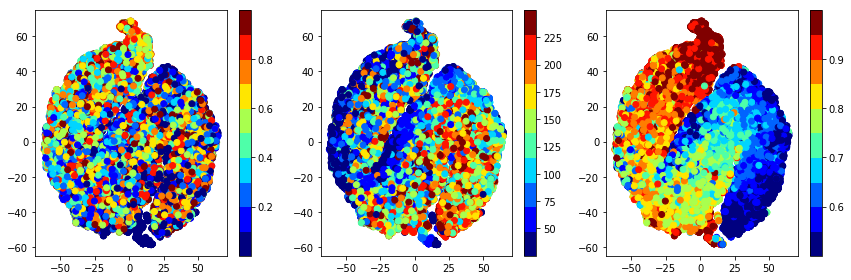

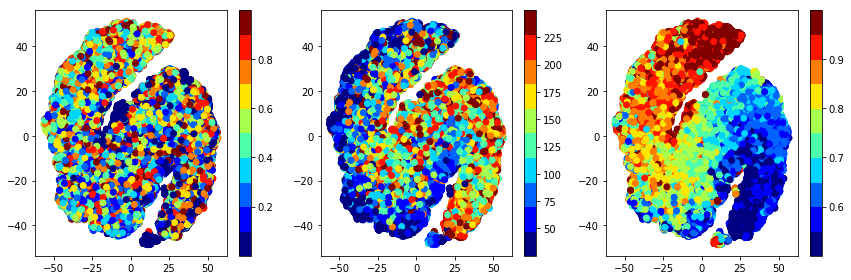

CPU times: user 1h 21min 29s, sys: 6min 19s, total: 1h 27min 49s
Wall time: 1h 27min 40s


In [119]:
%%time

# n = 100
n = X_train.shape[0]
for n_iter, perplexity in product([750, 1000], [5, 25, 50]):
    tsne = TSNE(n_components=2, n_iter=n_iter, perplexity=perplexity, random_state=1126)
    X_train_tsne = tsne.fit_transform(X_train_pca_for_tsne[:n])
    fig, axes = plt.subplots(1, n_targets)
    fig.set_figwidth(12)
    for i in range(n_targets):
        im = axes[i].scatter(X_train_tsne[:n, 0], X_train_tsne[:n, 1], c=Y_train[:n, i], cmap=plt.cm.get_cmap("jet", 10))
        plt.colorbar(im, ax=axes[i])
    plt.tight_layout()
    plt.show()

In [ ]:
%%time

overlap = [i for i in range(len(X_train)) if X_train[i] in X_test]

In [16]:
len(overlap)

372

In [22]:
%%time

x2idx = dict()

for i, x in enumerate(X_train):
    tx = tuple(x)
    if tx not in x2idx:
        x2idx[tx] = []
    x2idx[tx].append(i)

CPU times: user 55.3 s, sys: 3.57 s, total: 58.9 s
Wall time: 1min 4s


In [24]:
multiple_occ_idx = []

In [25]:
for x, idx in x2idx.items():
    if len(idx) > 1:
        multiple_occ_idx.append(idx)

In [28]:
len(multiple_occ_idx) + len(x2idx)

47500

In [27]:
max(map(len, multiple_occ_idx))

2